In [2]:
import matplotlib.pyplot as plt
import random as rnd
import math
import numpy as np
import time
import pandas as pd
import copy
from sklearn.preprocessing import normalize

In [3]:
# PARAMETER
x_topology = 5
y_topology = 5
learning_rate = 0.5
sigma = 2
nb_iteration = 100
input_neuron = 4

In [4]:
def initiate_random():
    #create random weight for each topology neuron
    weight_matrix = []
    for i in range(y_topology):
        # for each neuron in spesific hidden layer
        temp_weight_matrix = []
        for j in range(x_topology):
            random_weight_matrix = [rnd.uniform(0,1) for k in range(input_neuron)]
            temp_weight_matrix.append(random_weight_matrix)
        weight_matrix.append(temp_weight_matrix)
    return weight_matrix

def iris_dataset():
    #read iris_dataset
    iris_DF = pd.read_csv('Iris_Dataset.csv')
    # shuffle dataset
    iris_DF = iris_DF.sample(frac=1).reset_index(drop=True)
    # delete output column
    del iris_DF['Output']
    # convert dataframe to list
    data_list = iris_DF.values.tolist()
    # normalize
    data_list2 = np.array(data_list)
    #data_list3 = normalize(data_list2[:,0:4]).tolist()
    data_list3 = data_list2[:,0:4].tolist()
    return data_list3

def distance_calculation(weight_matrix, arbit_dataset):
    #for each neuron calc distance calculation
    distance_matrix = []
    winner_index = []
    for i in range(y_topology):
        temp_distance_matrix = []
        for j in range(x_topology):
            to_be_sqrt = 0
            for k in range(input_neuron):
                asd = (arbit_dataset[k] - weight_matrix[i][j][k])**2
                to_be_sqrt = to_be_sqrt + asd
            euclidean_dist = math.sqrt(to_be_sqrt)
            temp_distance_matrix.append(euclidean_dist)
        distance_matrix.append(temp_distance_matrix)
    min_value = np.min(distance_matrix)
    min_index = np.argmin(distance_matrix)
    # y_index
    winner_index.append(min_index//y_topology)
    # x_index
    winner_index.append(min_index%y_topology)
    return distance_matrix, winner_index, min_value

def weight_update(arbit_dataset, weight_matrix, distance_matrix, winner_index, current_iteration):
    delta_w_list = []
    learning_rate_t = learning_rate * (1 - (current_iteration / nb_iteration))
    for i in range(y_topology):
        temp_delta_w = []
        for j in range(x_topology):
            sigma_t = sigma * math.exp(-1 *(current_iteration/nb_iteration))
            dist_temp = 0
            coord_list = [i, j]
            for k in range(2):
                asdf = (winner_index[k] - coord_list[k])**2
                dist_temp = dist_temp + asdf
            euclidean_neuron = math.sqrt(dist_temp)
            influence_rate = math.exp(-1 * euclidean_neuron**2 / (2* (sigma_t**2)))
            temp_delta_w_per_neuron = []
            for k in range(input_neuron):
                delta_w = learning_rate_t * influence_rate * (arbit_dataset[k] - weight_matrix[i][j][k])
                temp_delta_w_per_neuron.append(delta_w)
            temp_delta_w.append(temp_delta_w_per_neuron)
        delta_w_list.append(temp_delta_w)
    return delta_w_list

def new_weight(weight_matrix, delta_w_list):
    new_weight_matrix = []
    for i in range(y_topology):
        temp_weight_matrix = []
        for j in range(x_topology):
            w = (np.array(weight_matrix[i][j]) + np.array(delta_w_list[i][j])).tolist()
            temp_weight_matrix.append(w)
        new_weight_matrix.append(temp_weight_matrix)
    return new_weight_matrix

def winner_index_list_create(weight_matrix, dataset_full):
    winner_index_list = []
    for i in range(len(dataset_full)):
        arbit_dataset = dataset_full[i]
        distance_matrix, winner_index, min_value = distance_calculation(weight_matrix, arbit_dataset)
        winner_index.append(1)
        winner_index_list.append(winner_index)
    return winner_index_list

In [60]:
def main_calc():
    #this should be the main code
    error_list = []
    weight_matrix = initiate_random()
    dataset = iris_dataset()
    for i in range(nb_iteration):
        min_total = 0
        for j in range(len(dataset)):
            arbit_dataset = dataset[j]
            distance_matrix, winner_index, min_value = distance_calculation(weight_matrix, arbit_dataset)
            min_total = min_total + min_value
            delta_w_list = weight_update(arbit_dataset, weight_matrix, distance_matrix, winner_index, i+1)
            # new weight_matrix
            weight_matrix = new_weight(weight_matrix, delta_w_list)
        error_list.append(min_total)
    distance_matrix, winner_index, min_value = distance_calculation(weight_matrix, arbit_dataset)
    winner_index_list = winner_index_list_create(weight_matrix, dataset)
    return weight_matrix, distance_matrix, error_list, winner_index_list

In [61]:
a, b, c, d = main_calc()

In [62]:
c[-1]

54.95286448361341

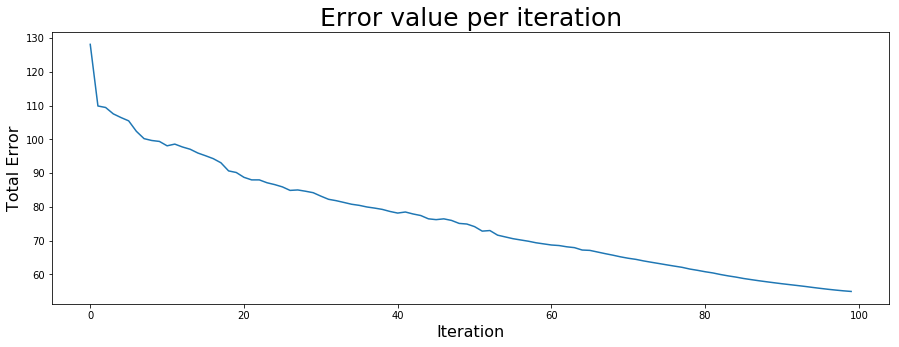

In [63]:
plt.figure(figsize=(15,5))
plt.title('Error value per iteration', size = 25)
plt.xlabel('Iteration', size = 16)
plt.ylabel('Total Error', size = 16)
#plt.text(400, .35, r'$\eta=%s \ | \ 1 \ Hidden \ Layer \ (%s \ node)$' %(learning_rate, neuron_layer_list[1]), size = 15) 
plt.plot(c)

In [64]:
d

[[0, 0, 1],
 [0, 4, 1],
 [3, 0, 1],
 [1, 4, 1],
 [0, 4, 1],
 [3, 0, 1],
 [0, 4, 1],
 [0, 0, 1],
 [2, 4, 1],
 [0, 0, 1],
 [2, 0, 1],
 [1, 2, 1],
 [2, 0, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 1, 1],
 [0, 0, 1],
 [3, 1, 1],
 [0, 0, 1],
 [2, 0, 1],
 [4, 0, 1],
 [4, 4, 1],
 [0, 1, 1],
 [0, 1, 1],
 [4, 1, 1],
 [3, 0, 1],
 [4, 0, 1],
 [3, 1, 1],
 [4, 2, 1],
 [2, 1, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [4, 0, 1],
 [2, 4, 1],
 [1, 2, 1],
 [1, 4, 1],
 [4, 1, 1],
 [0, 3, 1],
 [1, 4, 1],
 [4, 3, 1],
 [2, 4, 1],
 [2, 2, 1],
 [0, 1, 1],
 [2, 4, 1],
 [0, 4, 1],
 [4, 1, 1],
 [2, 2, 1],
 [2, 4, 1],
 [4, 0, 1],
 [2, 4, 1],
 [0, 4, 1],
 [2, 1, 1],
 [0, 1, 1],
 [2, 4, 1],
 [4, 0, 1],
 [4, 1, 1],
 [3, 0, 1],
 [0, 1, 1],
 [1, 4, 1],
 [4, 2, 1],
 [4, 3, 1],
 [1, 4, 1],
 [1, 0, 1],
 [2, 1, 1],
 [3, 0, 1],
 [1, 0, 1],
 [2, 2, 1],
 [0, 0, 1],
 [2, 2, 1],
 [1, 4, 1],
 [1, 4, 1],
 [3, 1, 1],
 [4, 0, 1],
 [2, 0, 1],
 [2, 1, 1],
 [0, 4, 1],
 [0, 2, 1],
 [0, 4, 1],
 [2, 4, 1],
 [2, 0, 1],
 [1, 4, 1],
 [2, 4, 1],
 [4,

In [65]:
d.sort()

In [66]:
d

[[0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 1, 1],
 [0, 2, 1],
 [0, 2, 1],
 [0, 2, 1],
 [0, 2, 1],
 [0, 3, 1],
 [0, 3, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [0, 4, 1],
 [1, 0, 1],
 [1, 0, 1],
 [1, 0, 1],
 [1, 0, 1],
 [1, 0, 1],
 [1, 1, 1],
 [1, 2, 1],
 [1, 2, 1],
 [1, 2, 1],
 [1, 3, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [1, 4, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 0, 1],
 [2, 1, 1],
 [2, 1, 1],
 [2, 1, 1],
 [2, 1, 1],
 [2, 1, 1],
 [2, 1, 1],
 [2,

In [67]:
d_DF = pd.DataFrame(d)

In [68]:
a = d_DF.groupby([0,1], as_index = False).sum()

In [69]:
a.values.tolist()

[[0, 0, 10],
 [0, 1, 9],
 [0, 2, 4],
 [0, 3, 2],
 [0, 4, 19],
 [1, 0, 5],
 [1, 1, 1],
 [1, 2, 3],
 [1, 3, 1],
 [1, 4, 12],
 [2, 0, 11],
 [2, 1, 6],
 [2, 2, 4],
 [2, 4, 16],
 [3, 0, 6],
 [3, 1, 6],
 [3, 2, 1],
 [4, 0, 12],
 [4, 1, 8],
 [4, 2, 4],
 [4, 3, 7],
 [4, 4, 3]]

In [71]:
len(a)

22

In [5]:
weight_matrix = []
for i in range(y_topology):
    # for each neuron in spesific hidden layer
    temp_weight_matrix = []
    for j in range(x_topology):
        random_weight_matrix = [rnd.uniform(0,1) for k in range(input_neuron)]
        temp_weight_matrix.append(random_weight_matrix)
    weight_matrix.append(temp_weight_matrix)

In [6]:
weight_matrix

[[[0.49627039899234104,
   0.3048559438874119,
   0.573055458434062,
   0.5401049316439861],
  [0.23448438107664316,
   0.537597603491413,
   0.14297041857347736,
   0.7231564349941086],
  [0.17366975016125852,
   0.3042356177531249,
   0.32869135573222985,
   0.6997746898943865],
  [0.5177014579010151,
   0.8525150303687984,
   0.5930518020252425,
   0.035111992539977877],
  [0.6867758349423058,
   0.35653374234624235,
   0.3651858660786317,
   0.39743518666867406]],
 [[0.5731124731793299,
   0.681140850661494,
   0.20855860686225525,
   0.6748273347573703],
  [0.23764442666010566,
   0.3714851315420875,
   0.7435837034657092,
   0.05464531366962311],
  [0.2543066700785852,
   0.30844887859508974,
   0.11343214909794319,
   0.7976779400520077],
  [0.9227528151624574,
   0.30820595159691677,
   0.8295795897685924,
   0.9852804088110844],
  [0.7940338548666362,
   0.11041994303168423,
   0.1962051908494692,
   0.35763400117613253]],
 [[0.053302470526288004,
   0.20888604290521728,
   0.